<div style="font-family: Arial, Helvetica, sans-serif;">
    <div style="display: flex;padding-top: 20px">
        <div><strong>Course:</strong> Introduction to Data Science</div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Class:</strong> KHDL1</div>
        <div></div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Group:</strong> 11 - HAHA</div>
    </div>
    <div>
        <div style="display: flex;padding-top: 20px">
            <div style="padding-right: 10px;"><strong>Members:</strong></div>
            <div></div>
        </div>
        <table style="font-size: 15px; display:flex;padding-top: 20px">
            <tr>
                <th>No.</th>
                <th>Student ID</th>
                <th>Name</th>
            </tr>
            <tr>
                <td>1</td>
                <td>22127008</td>
                <td style="text-align:left;">Đặng Châu Anh</td>
            </tr>
            <tr>
                <td>2</td>
                <td>22127014</td>
                <td style="text-align:left;">Nguyễn Kim Anh</td>
            </tr>
            <tr>
                <td>3</td>
                <td>22127147</td>
                <td style="text-align:left;">Đỗ Minh Huy</td>
            </tr>
            <tr>
                <td>4</td>
                <td>22127170</td>
                <td style="text-align:left;">Trần Dịu Huyền</td>
            </tr>
        </table>
    </div>
    <div style="font-size: 25px ;font-weight: 800; text-align: center;padding-top: 20px;">FINAL PROJECT</div>
    <div style="font-size: 20px ;font-weight: 800; text-align: center;padding-top: 20px;">SPOTIFY 2024 REWIND - DATA ANALYSIS</div>
</div>

# **Data Exploration**
## **Import libraries**

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import time
from datetime import datetime
import matplotlib.patches as mpatches
import re

## **Read data from csv data files**

Read data from `spotify_charts_cleaned.csv` files in folder `cleaned_data` into a DataFrame.

In [27]:
df = pd.read_csv('cleaned_data/spotify_charts_cleaned.csv')
df

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,month
0,1,spotify:track:2HRgqmZQC0MC7GeNuDIXHN,"Jung Kook, Latto",Seven (feat. Latto) (Explicit Ver.),BIGHIT MUSIC,1,1,29,1178606,1
1,2,spotify:track:4qYfRfSxsmhJ1WMaywtLyI,"Wren Evans, itsnk",Từng Quen,Universal Music Indochina,1,2,14,1087520,1
2,3,spotify:track:0X28PqBpbQhWdi4usYw0w5,"Wren Evans, itsnk",Tò Te Tí,Universal Music Indochina,3,4,7,1036739,1
3,4,spotify:track:1khMN4Adfi3LrZvxOq4YM5,"VSOUL, RPT MCK, Obito, Ronboogz, Boyzed","Buồn Hay Vui (feat. RPT MCK, Obito, Ronboogz &...",12 trái lê,3,5,6,919584,1
4,5,spotify:track:1bG6Q8sR8jda7ryI365y8o,"Vũ., Dear Jane",Những Lời Hứa Bỏ Quên,WM Vietnam,1,3,7,856107,1
...,...,...,...,...,...,...,...,...,...,...
1995,196,spotify:track:7sZgr8RsXkDwkmiQok691a,Thịnh Suy,Mai Mình Xa,InQ International,85,187,28,145969,10
1996,197,spotify:track:2M2nM9t0YQoXMTnFH8AXBu,"Huỳnh Tú, Andiez",Đường Một Chiều,Huỳnh Tú,114,191,67,145160,10
1997,198,spotify:track:45Mswno1F7FoZkcmQkp7fi,Wren Evans,Thích Em Hơi Nhiều,Universal Music Indochina,1,-1,168,145003,10
1998,199,spotify:track:23ep27rDA9gklIzuJ6qzRD,Dương Domic,Yêu Em 2 Ngày,DAO Entertainment,174,-1,5,143566,10


## **Data Preprocessing:**

We can see that the data contains `uri` column which is not useful for our analysis. But, we can using these values to get more information about the songs. We can use the `uri` values to get the audio release date of the songs from the Spotify website.
- First, we will extract the id trong `uri` column.

In [7]:
def extract_id(uri):
    return uri.split(':')[-1]

track_id = []
for uri in df['uri']:
    track_id.append(extract_id(uri))

- Second, we will use the `track_id` to get the audio features of the songs by parse HTML from the Spotify website and add the `release_date` and `duration` features to the DataFrame.

In [ ]:
def get_track_info(track_id):
    url = f"https://open.spotify.com/track/{track_id}"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        release_date_tag = soup.find('meta', {'name': 'music:release_date'})
        duration_tag = soup.find('meta', {'name': 'music:duration'})
        
        release_date = release_date_tag['content'] if release_date_tag else 'Release date not found'
        duration = duration_tag['content'] if duration_tag else 'Duration not found'
        
        return release_date, duration
    else:
        return 'Request failed', 'Request failed'
    
# Get release dates and music durations
release_dates = []
durations = []

for id in track_id:
    release_date, duration = get_track_info(id)
    time.sleep(3)
    release_dates.append(release_date)
    durations.append(duration)
    
# Add the release dates and music durations to the DataFrame
df['release_date'] = release_dates
df['duration'] = durations

- Besides, we also need to format `uri` by removing the 'spotify:track:' prefix and extracting unique values for processing, and then retrieve the `rank_history` (track's historical ranking data) for each URI.

In [ ]:
# Format uri
df['uri'] = df['uri'].str.replace('spotify:track:', '')
uri_list = df['uri'].unique()

# Request to get audio features
uri_data = {}
for uri in uri_list:
    url = f'https://kworb.net/spotify/track/{uri}.html'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract peak and streams for VN
    weekly_data = soup.find('div', class_='weekly')
    if weekly_data:
        rows = weekly_data.find_all('tr')[2:]  # Skip header row
        ranks = []
        for row in rows:
            cols = row.find_all('td')
            vn_data = []
            if len(cols) > 3:
                date = cols[0].text.strip()
                vn_data = cols[3].find_all('span', class_='p')
            else:
                date = cols[0].text.strip()
                vn_data = cols[1].find_all('span', class_='p')
            if vn_data:
              rank = int(vn_data[0].text)
            if date != 'Peak':
              ranks.append((date, rank))

        uri_data[uri] = {
            'uri': uri,
            'rank_history': ranks
        }

    time.sleep(1)

We receive a DataFrame where the indexes (rows) are the URIs, and the columns contain information about the URI and its ranking history.

In [ ]:
uri_data = pd.DataFrame(uri_data)
uri_data = uri_data.T.reset_index(drop=True)
uri_data

,uri,rank_history
0,2HRgqmZQC0MC7GeNuDIXHN,"[('2023/07/20', 1), ('2023/07/27', 1), ('2023/..."
1,4qYfRfSxsmhJ1WMaywtLyI,"[('2023/11/02', 2), ('2023/11/09', 2), ('2023/..."
2,0X28PqBpbQhWdi4usYw0w5,"[('2023/12/21', 83), ('2023/12/28', 11), ('202..."
3,1khMN4Adfi3LrZvxOq4YM5,"[('2023/12/28', 76), ('2024/01/04', 3), ('2024..."
4,1bG6Q8sR8jda7ryI365y8o,"[('2023/12/21', 5), ('2023/12/28', 1), ('2024/..."
...,...,...
441,2dHoVW9AxJVSRebPRyV2aA,"[('2021/03/18', 2), ('2021/03/25', 4), ('2021/..."
442,5O2P9iiztwhomNh8xkR9lJ,"[('2014/11/23', 22), ('2014/11/30', 22), ('201..."
443,5kJMW3pK49PvQDtpVryHf5,"[('2022/11/24', 55), ('2022/12/01', 31), ('202..."
444,21LtZQQMQYwVIxc9O9Ygq8,"[('2024/10/24', 180), ('2024/10/31', 41), ('20..."


The `filter_rank_changes` function removes any rank data where the ranking remains the same as the previous one, keeping only the changes in rank over time. It always retains the first rank entry. 

In [ ]:
# Filter out unchanged ranks
def filter_rank_changes(rank_history):
    filtered_history = [rank_history[0]]  # Always keep the first element
    for i in range(1, len(rank_history)):
        if rank_history[i][1] != rank_history[i-1][1]:
            filtered_history.append(rank_history[i])
    return filtered_history

# Apply the function to the rank_history column
uri_data['rank_history'] = uri_data['rank_history'].apply(filter_rank_changes)
uri_data

,uri,rank_history
0,2HRgqmZQC0MC7GeNuDIXHN,"[(2023/07/20, 1), (2023/11/09, 3), (2023/12/07..."
1,4qYfRfSxsmhJ1WMaywtLyI,"[(2023/11/02, 2), (2023/12/07, 4), (2023/12/21..."
2,0X28PqBpbQhWdi4usYw0w5,"[(2023/12/21, 83), (2023/12/28, 11), (2024/01/..."
3,1khMN4Adfi3LrZvxOq4YM5,"[(2023/12/28, 76), (2024/01/04, 3), (2024/01/1..."
4,1bG6Q8sR8jda7ryI365y8o,"[(2023/12/21, 5), (2023/12/28, 1), (2024/01/04..."
...,...,...
441,2dHoVW9AxJVSRebPRyV2aA,"[(2021/03/18, 2), (2021/03/25, 4), (2021/04/01..."
442,5O2P9iiztwhomNh8xkR9lJ,"[(2014/11/23, 22), (2021/05/13, 198), (2021/06..."
443,5kJMW3pK49PvQDtpVryHf5,"[(2022/11/24, 55), (2022/12/01, 31), (2022/12/..."
444,21LtZQQMQYwVIxc9O9Ygq8,"[(2024/10/24, 180), (2024/10/31, 41), (2024/11..."


Then, we merge this uri_data dataset into df dataset using the common `uri` column. And, this is the new `df` dataset that we will use for the analysis.

In [ ]:
df_merged = pd.merge(df, uri_data, how='left', on='uri')
df = df_merged
df.sample(5)

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,month,release_date,duration,rank_history
1764,165,4g34IscInBSNfzaaaEqfZN,Quang Hùng MasterD,Đừng Vì Anh Mà Khóc,Theanh28 Entertainment,152,152,3,152276,9,2019-12-20,355.0,"[('2024/09/19', 184), ('2024/09/26', 152), ('2..."
846,47,5iZHnufFUgATzrpGgH1K0W,T.R.I,Ánh Sao Và Bầu Trời,Yin Yang Media,1,53,135,234496,5,2021-09-10,261.0,"[('2021/11/11', 113), ('2021/11/18', 146), ('2..."
1850,51,4HgTGTXHt1zie3upsI50zm,Ngô Lan Hương,Đi Giữa Trời Rực Rỡ (Original Soundtrack from ...,SK Pictures,34,40,10,363389,10,2024-08-05,221.0,"[('2024/08/29', 147), ('2024/09/05', 83), ('20..."
100,101,1fh5Sf3fFESFOS8D82RQiI,"AMEE, Hoàng Dũng",từ thích thích thành thương thương,Yin Yang Media,6,101,115,179386,1,2020-12-16,204.0,"[('2020/12/10', 101), ('2020/12/17', 7), ('202..."
1547,148,25edeHHueINMguqu9emCyV,"Đen, Phương Anh Đào",Lối Nhỏ,Đen,1,152,254,154525,8,2019-10-21,253.0,"[('2019/10/31', 1), ('2019/11/07', 1), ('2019/..."


We have to check for missing values in the dataset again to ensure that there are no missing `release_date` values and `duration` values.

In [41]:
df.isna().sum()

rank                0
uri                 0
artist_names        0
track_name          0
source              0
peak_rank           0
previous_rank       0
weeks_on_chart      0
streams             0
month               0
release_date        0
duration            0
rank_history      163
dtype: int64

The `rank_history` column is crawled from an external source, and as a result, missing data between sources may occur. Unfortunately, this cannot be filled using any methods without potentially introducing significant bias, so we fill it with [] as a placeholder.

In [42]:
df['rank_history'] = df['rank_history'].fillna('[]')

It seems that there are no missing values in the `release_date` column but we have to check does the `release_date` column contain any tag `Release date not found` or `Request failed` not. If it does, we still consider it as missing values.

In [43]:

missing_values = df[
    (df['release_date'] == 'Release date not found') | (df['release_date'] == 'Request failed') |
    (df['duration'] == 'Duration not found') | (df['duration'] == 'Request failed')
]
missing_values

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,month,release_date,duration,rank_history


Thus, there are no missing values in the `release_date` and `duration` column. We can move on duplicated values checking.

In [44]:
df.duplicated().sum()

0

Thus, there are no duplicated values, so we can move to the next step, datatypes checking. Taking a look at the datatypes of the columns for ensuring that all the columns have correct datatypes for further analysis.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            2000 non-null   int64  
 1   uri             2000 non-null   object 
 2   artist_names    2000 non-null   object 
 3   track_name      2000 non-null   object 
 4   source          2000 non-null   object 
 5   peak_rank       2000 non-null   int64  
 6   previous_rank   2000 non-null   int64  
 7   weeks_on_chart  2000 non-null   int64  
 8   streams         2000 non-null   int64  
 9   month           2000 non-null   int64  
 10  release_date    2000 non-null   object 
 11  duration        2000 non-null   float64
 12  rank_history    2000 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 218.8+ KB


As we can see, the `release_date`, `duration` and `month` columns have the wrong datatypes. We will convert the `release_date` column to datetime datatype, the `duration` column to float datatype and the `month` column to category.

In [46]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')
df['month'] = df['month'].astype('object')
df['duration'] = df['duration'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   rank            2000 non-null   int64         
 1   uri             2000 non-null   object        
 2   artist_names    2000 non-null   object        
 3   track_name      2000 non-null   object        
 4   source          2000 non-null   object        
 5   peak_rank       2000 non-null   int64         
 6   previous_rank   2000 non-null   int64         
 7   weeks_on_chart  2000 non-null   int64         
 8   streams         2000 non-null   int64         
 9   month           2000 non-null   object        
 10  release_date    2000 non-null   datetime64[ns]
 11  duration        2000 non-null   float64       
 12  rank_history    2000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 218.8+ KB


Now, it seems that the data is ready for further analysis.

## **Data Analysis:**
### **Relationship between features:**
We will extract the numeric feature and use the `corr()` method to calculate the correlation between these.

In [ ]:
# Extract numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['rank', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams', 'duration']

Though, we extract the numeric features are: `rank`, `peak_rank`, `previous_rank`, `weeks_on_chart`, `streams`. But we have to understand that the `rank` , `peak_rank` and `previous_rank` are not numeric features, they are ordinal features.
Now, we will calculate the correlation between them.

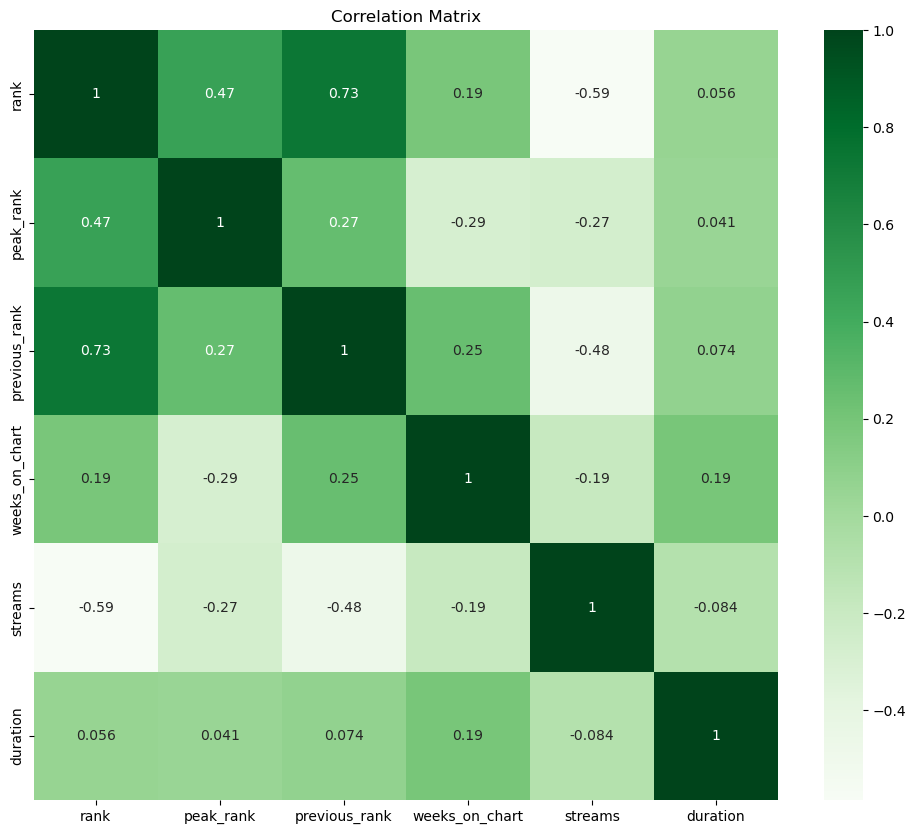

In [ ]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

Comment on the relationship between the features:
- The `previous_rank` and `rank` columns have a strong positive correlation with a value of 0.73. This means that the higher the previous rank, the higher the current rank.
- The `rank` and `stream` has a negative correlation with a value of -0.59. It is quite of interesting that is the higher rank mean larger number represent for the rank. Thus, the smaller number showed in `rank` column, the higher the stream number.
- The `previous_rank` and `stream` columns have a negative correlation with a value of -0.48. This is similar to the relationship between `rank` and `stream`, the higher the previous rank (smaller the number represented for `previous_rank`), the higher the stream number.
- The `rank` and `peak_rank` columns have a moderate positive correlation with a value of 0.47. This means that the higher the rank, the higher the peak rank.

#### **Correlation between `previous_rank` and `rank`**

Scatter plot of the relationship between 'rank' and 'previous_rank'

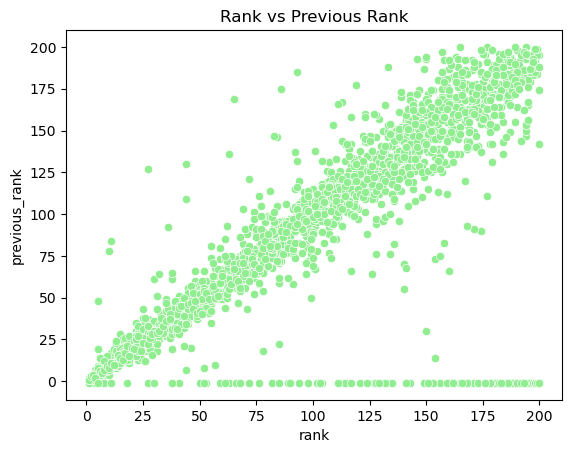

In [ ]:
sns.scatterplot(x='rank', y='previous_rank', data=df, color='lightgreen')
plt.title('Rank vs Previous Rank')
plt.show()

#### **Correlation between `rank` and `streams`**

Scatter plot of the relationship between 'rank' and 'streams'

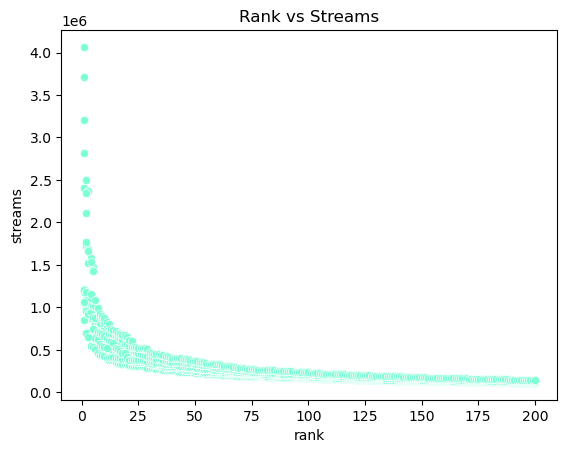

In [ ]:
sns.scatterplot(x='rank', y='streams', data=df, color='aquamarine')
plt.title('Rank vs Streams')
plt.show()

#### **Correlation between `previous_rank` and `streams`**

Scatter plot of the relationship between 'previous_rank' and 'streams'

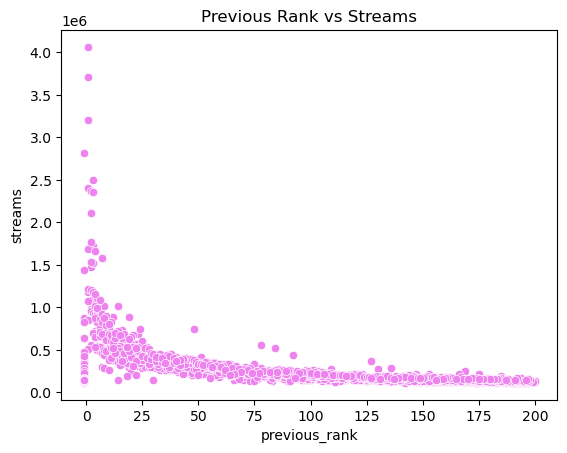

In [ ]:
sns.scatterplot(x='previous_rank', y='streams', data=df, color='violet')
plt.title('Previous Rank vs Streams')
plt.show()

#### **Correlation between `rank` and `peak_rank`**

Scatter plot of the relationship between 'rank' and 'peak_rank'

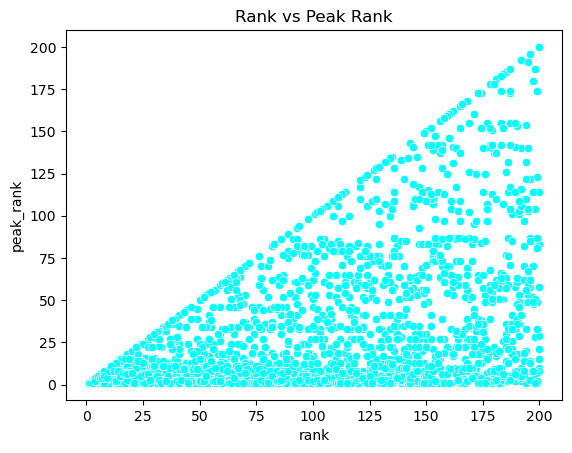

In [ ]:
sns.scatterplot(x='rank', y='peak_rank', data=df, color='cyan')
plt.title('Rank vs Peak Rank')
plt.show()

### **Top 20 songs with the highest streams total:**

In [ ]:
# Aggregate streams by track_name
aggregated_streams = (
    df.groupby('track_name')
    .agg({'streams': 'sum'})
    .reset_index()
)

# Merge the aggregated streams back with the original DataFrame to keep all columns
top_stream_df = df.merge(aggregated_streams, on='track_name', how='left')

# Sort by the summed streams, keeping all columns
top_stream_df = (
    top_stream_df
    .drop(columns='streams_x')
    .rename(columns={'streams_y': 'streams'})
    .sort_values(by='streams', ascending=False)  # 'streams_y' is the aggregated 'streams'
    .drop_duplicates(subset='track_name')
    .reset_index(drop=True)
)

# Print or view the result
top_stream_df.head(20)


,rank,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,month,release_date,duration,rank_history,streams
0,1,"Jung Kook, Latto",Seven (feat. Latto) (Explicit Ver.),BIGHIT MUSIC,1,1,29,1,2023-11-03,184.0,"[('2024/01/04', 1)]",17873763
1,1,Jung Kook,Standing Next to You,BIGHIT MUSIC,1,2,30,5,2023-11-03,206.0,"[('2024/05/16', 2), ('2024/05/23', 1), ('2024/...",12474645
2,1,Jimin,Who,BIGHIT MUSIC,1,1,7,8,2024-07-19,171.0,"[('2024/08/08', 2)]",10833857
3,12,V,Love Me Again,BIGHIT MUSIC,2,10,60,9,2023-08-11,182.0,"[('2023/09/21', 4), ('2024/09/05', 14), ('2024...",6915933
4,2,"Wren Evans, itsnk",Từng Quen,Universal Music Indochina,1,2,14,1,2023-12-17,175.0,"[('2024/01/11', 4), ('2024/01/25', 2)]",5406165
5,13,"CoolKid, RHYDER",Sau Cơn Mưa,MaiDao Music,8,11,53,8,2023-07-28,155.0,"[('2024/08/01', 9), ('2024/08/08', 10), ('2024...",5002778
6,23,"HIEUTHUHAI, marzuz",Exit Sign,M Music Records,19,27,38,6,2023-10-16,202.0,"[('2024/06/06', 19), ('2024/06/13', 21), ('202...",4931782
7,36,"Vũ., Dear Jane",Những Lời Hứa Bỏ Quên,WM Vietnam,1,43,38,8,2023-12-14,236.0,"[('2024/08/01', 28), ('2024/08/08', 40), ('202...",4889475
8,11,"RHYDER, CoolKid, BAN",Chịu Cách Mình Nói Thua,RHYDER,6,9,19,3,2023-11-22,182.0,"[('2024/03/07', 9), ('2024/03/14', 10), ('2024...",4829311
9,4,Jimin,Like Crazy,BIGHIT MUSIC,1,7,67,6,2023-03-24,212.0,"[('2023/06/01', 10), ('2023/06/08', 8), ('2023...",4789640


### **Number of songs released in each month:**

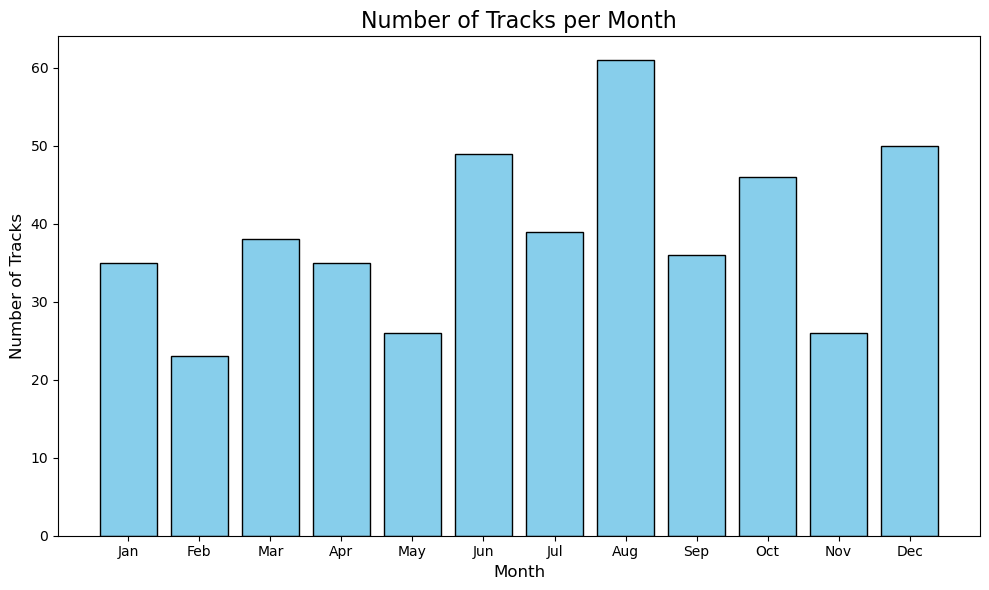

In [ ]:
# Bar chart (axis x: month, axis y:  number of tracks)

# Convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

top_song_df = df.copy()
top_song_df['release_month'] = top_song_df['release_date'].dt.month
top_song_df['release_year'] = top_song_df['release_date'].dt.year

# Remove duplicate track_name within the same month
df_unique_tracks = top_song_df.drop_duplicates(subset=['track_name', 'release_month', 'release_year'])

monthly_counts = df_unique_tracks['release_month'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Number of Tracks per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)

# Add x-axis ticks for months
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

# Show the plot
plt.tight_layout()
plt.show()

### **Duration trend of this year by ranking**
- Top 20 songs in ranking with their duration.
- Trend of average duration of songs based on ranking.

In [ ]:
# Sort the DataFrame by ranking in ascending order
top_20_songs = df.drop_duplicates(subset='track_name').sort_values(by='rank').head(20).reset_index(drop=True)

# Select relevant columns
top_20_with_duration = top_20_songs[['track_name', 'rank', 'duration']]

top_20_songs


,rank,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,month,release_date,duration,rank_history
0,1,"Jung Kook, Latto",Seven (feat. Latto) (Explicit Ver.),BIGHIT MUSIC,1,1,29,1178606,1,2023-11-03,184.0,"[('2024/01/04', 1)]"
1,1,"Jimin, Loco",Smeraldo Garden Marching Band (feat. Loco),BIGHIT MUSIC,1,-1,1,2817972,6,2024-06-28,183.0,[]
2,1,Jimin,Who,BIGHIT MUSIC,1,1,2,3711456,7,2024-07-19,171.0,"[('2024/07/25', 1)]"
3,1,Sơn Tùng M-TP,Chúng Ta Của Tương Lai,Universal Music Indochina Distributed Labels,1,1,4,1068916,3,2024-03-08,250.0,"[('2024/03/14', 1), ('2024/03/21', 2), ('2024/..."
4,2,"Wren Evans, itsnk",Từng Quen,Universal Music Indochina,1,2,14,1087520,1,2023-12-17,175.0,"[('2024/01/11', 4), ('2024/01/25', 2)]"
5,2,Vũ Cát Tường,Từng Là,Universal Music Indochina Distributed Labels,2,2,5,952565,3,2024-03-01,253.0,"[('2024/03/07', 7), ('2024/03/14', 2), ('2024/..."
6,2,Beat Record,Standing Next to You - Sped Up - Remix,Pablo Nunes,1,2,17,977406,2,2024-02-28,211.0,"[('2024/02/29', 2)]"
7,3,Sơn Tùng M-TP,Đừng Làm Trái Tim Anh Đau,Universal Music Indochina Distributed Labels,1,1,4,1687632,6,2024-06-08,279.0,"[('2024/06/13', 1)]"
8,3,Phan Mạnh Quỳnh,"Sau Lời Từ Khước (Theme Song From ""MAI"")",Yin Yang Media,3,3,2,964968,2,2024-02-14,250.0,"[('2024/02/22', 3)]"
9,3,"Wren Evans, itsnk",Tò Te Tí,Universal Music Indochina,3,4,7,1036739,1,2023-12-17,195.0,"[('2024/01/04', 4), ('2024/01/11', 3), ('2024/..."


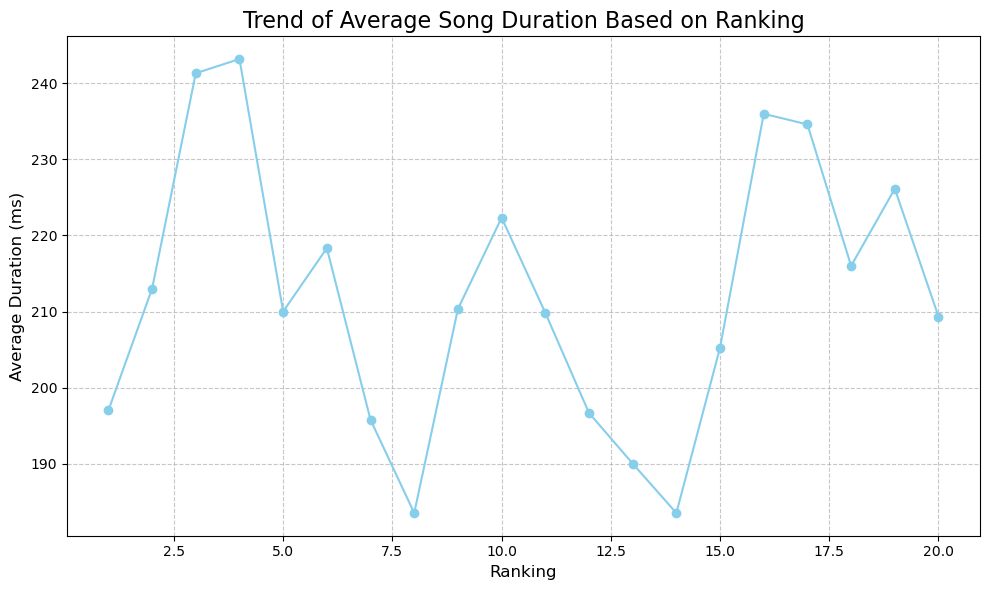

In [ ]:
average_duration = (
    df[df['rank'] <= 20]  # Filter tracks with rank <= 20
    .drop_duplicates(subset='track_name')  # Drop duplicates by track name
    .sort_values(by='rank')  # Sort by rank
    .groupby('rank')['duration']  # Group by rank
    .mean()  # Calculate the mean duration
)

# View the result
average_duration

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(average_duration.index, average_duration.values, marker='o', color='skyblue')

# Add labels and title
plt.title('Trend of Average Song Duration Based on Ranking', fontsize=16)
plt.xlabel('Ranking', fontsize=12)
plt.ylabel('Average Duration (ms)', fontsize=12)

# Show grid and plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **Top 20 Artists with Most Songs in Top**

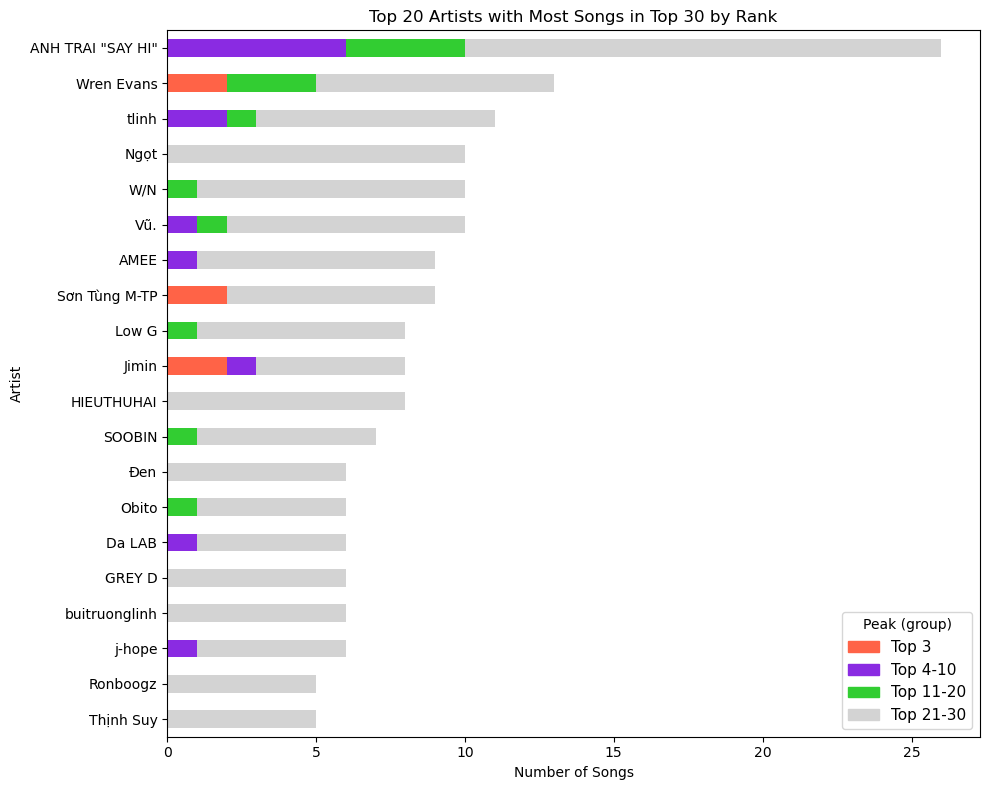

In [114]:
# Split artist_names into separate rows for each artist
df_exploded = df.assign(artist_names=df['artist_names'].str.split(',')).explode('artist_names')

# Ensure that there are no leading/trailing spaces in the artist names
df_exploded['artist_names'] = df_exploded['artist_names'].str.strip()

# Group by artist and rank, then count the number of songs
rank_counts = df_exploded.drop_duplicates('track_name').groupby(['artist_names', 'rank']).size().unstack(fill_value=0)

# Sort artists by the total number of songs
rank_counts['Total'] = rank_counts.sum(axis=1)
rank_counts = rank_counts.sort_values(by='Total', ascending=False).head(20)
rank_counts = rank_counts[::-1]

# Define the custom colors for each rank group
rank_colors = {
    'Top3': '#FF6347',  # Brighter red
    'Top4-10': '#8A2BE2',  # Brighter purple
    'Top11-20': '#32CD32',  # Brighter green
    'Top21-30': '#D3D3D3'   # Lighter gray
}

# Create a custom color mapping based on rank
color_mapping = []
for rank in rank_counts.columns[:-1]:  # Exclude 'Total' column
    if int(rank) <= 3:
        color_mapping.append(rank_colors['Top3'])
    elif 4 <= int(rank) <= 10:
        color_mapping.append(rank_colors['Top4-10']) 
    elif 11 <= int(rank) <= 20:
        color_mapping.append(rank_colors['Top11-20'])
    else:
        color_mapping.append(rank_colors['Top21-30'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
bars = rank_counts.drop(columns='Total').plot(kind='barh', stacked=True, ax=ax, color=color_mapping)

# Customizing the plot
ax.set_xlabel('Number of Songs')
ax.set_ylabel('Artist')
ax.set_title('Top 20 Artists with Most Songs in Top 30 by Rank')

# Manually creating legend handles to match the custom colors
legend_handles = [
    mpatches.Patch(color=rank_colors['Top3'], label='Top 3'),
    mpatches.Patch(color=rank_colors['Top4-10'], label='Top 4-10'),
    mpatches.Patch(color=rank_colors['Top11-20'], label='Top 11-20'),
    mpatches.Patch(color=rank_colors['Top21-30'], label='Top 21-30')
]

# Position the legend in the bottom-right corner inside the plot area
ax.legend(handles=legend_handles, title='Peak (group)', loc='lower right', bbox_to_anchor=(1, 0), fontsize=11)

# Ensure layout is adjusted
plt.tight_layout()

# Display the plot
plt.show()

## **Questions**
**Question 1:** What strategy should the artist use to launch their product on Spotify in 2024 to maximize the number of streams?
- Purpose: Find out the top months that the artist release new song and using these information to provide insights about what strategy the artist should use to launch their product on Spotify in 2024 to maximize the number of streams.
- Steps to answer:
    + Calculate the total number of songs released each month in 2024.
    + Create a bar chart showing the number of songs released each month in 2024.
    + Identify the months with a significantly higher number of song releases in 2024.
    + Provide insights and propose a strategy for product releases.

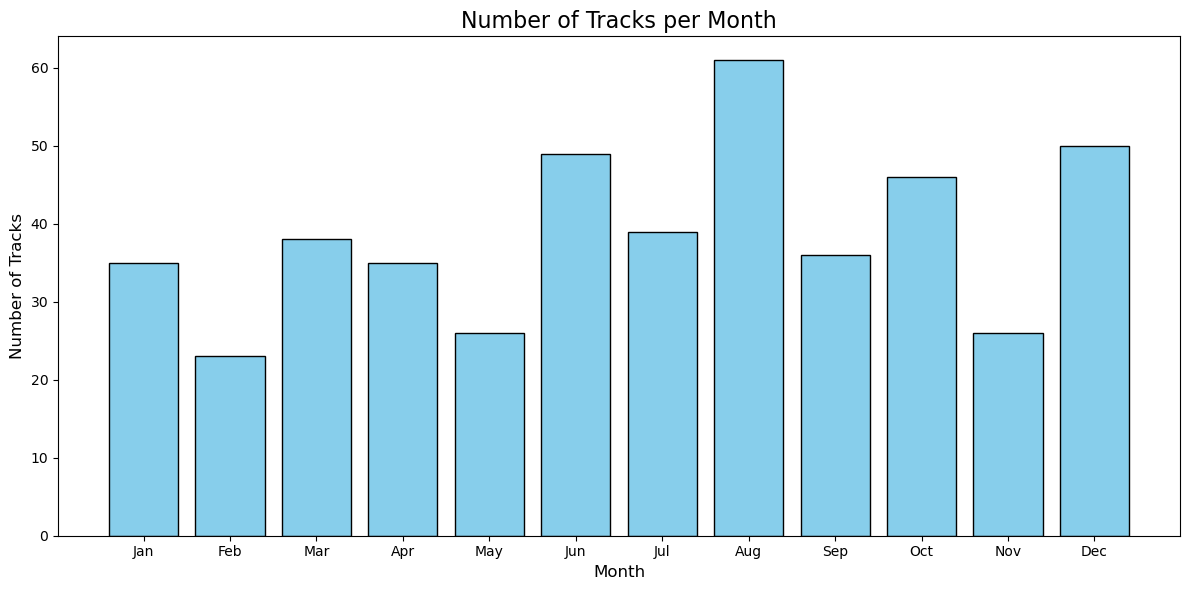

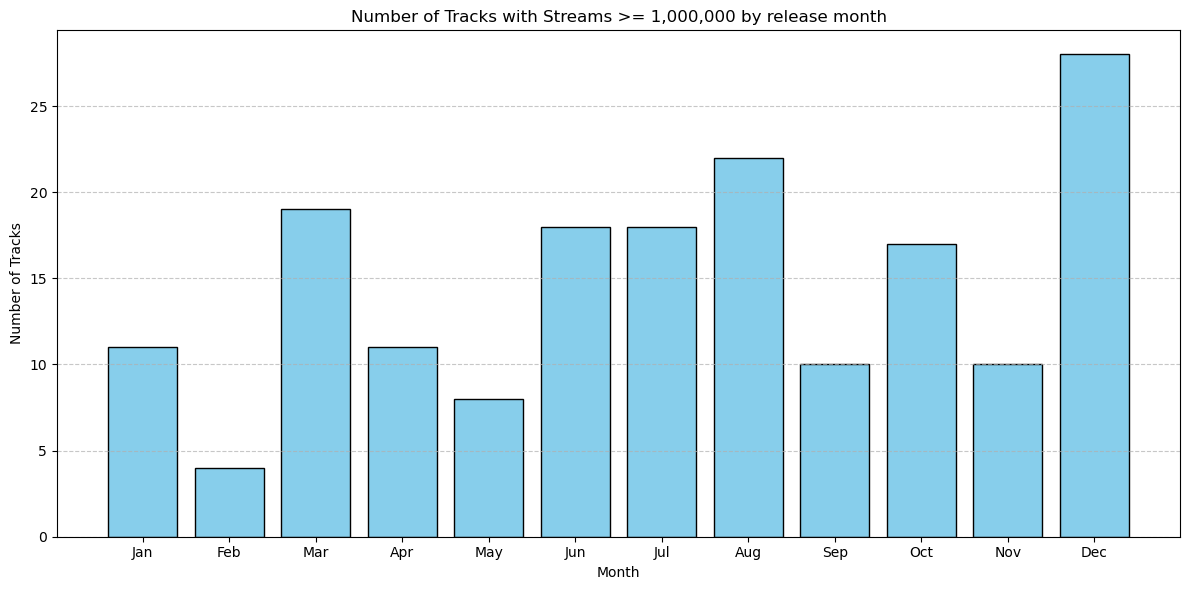

In [ ]:
# Bar chart (axis x: month, axis y:  number of tracks)

def visualize_tracks_by_month(df):
    # Convert release_date to datetime format
    df['release_date'] = pd.to_datetime(df['release_date'])

    top_song_df = df.copy()
    top_song_df['release_month'] = top_song_df['release_date'].dt.month
    top_song_df['release_year'] = top_song_df['release_date'].dt.year

    # Remove duplicate track_name within the same month
    df_unique_tracks = top_song_df.drop_duplicates(subset=['track_name', 'release_month', 'release_year'])

    monthly_counts = df_unique_tracks['release_month'].value_counts().sort_index()

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue', edgecolor='black')

    # Add titles and labels
    plt.title('Number of Tracks per Month', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Tracks', fontsize=12)

    # Add x-axis ticks for months
    plt.xticks(ticks=range(1, 13), labels=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ])

    # Show the plot
    plt.tight_layout()
    plt.show()
    
def visualize_top_stream_by_release_month(df):
    # Filter tracks with streams > 100,000
    filtered_df = df[df['streams'] >= 1000000]
    # Group by month and count tracks
    result = filtered_df.groupby(filtered_df['release_date'].dt.month)['track_name'].count().reset_index()
    result.columns = ['month', 'num_tracks']
    # Create visualization
    plt.figure(figsize=(12, 6))
    plt.bar(result['month'], result['num_tracks'], color='skyblue', edgecolor='black')
    
    # Set labels and title
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.xlabel('Month')
    plt.ylabel('Number of Tracks')
    plt.title('Number of Tracks with Streams >= 1,000,000 by release month')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()
    
visualize_tracks_by_month(df)
visualize_top_stream_by_release_month(top_stream_df)

Based on the these visualizations:

- The number of tracks per month shows a significant increase in July, August, and December compared to other months.
- The number of tracks with over 1,000,000 streams per month also exhibits a substantial spike in July, August, and December.
- The number of songs released is highest in August, but the number of songs making it to the top is highest in December:
    - This may indicate that December is a time when the market has more listeners (e.g., during the festive season, year-end), increasing the chances for songs released in this month to make it to the top.
- March has a relatively high percentage of songs making it to the top (50%), even though it’s not the month with the highest number of releases:
    - This could be related to the quality of the songs released in March or effective promotional strategies.
- February has the fewest song releases and the lowest percentage of songs making it to the top (<20%):
    - This may be a low point in the year when the music market is less active, reducing the chances for songs to achieve high rankings.
- The percentage of songs making it to the top and the number of songs released tend to have a proportional relationship:
    - The charts show that the number of songs released in a month often determines the percentage of songs making it to the top. However, there are exceptions like March (fewer songs but a higher percentage making it to the top).

A potential product release strategy could be:

- Artists tend to follow market trends, focusing on releasing music during peak months like August. However, December appears to be the most effective time to achieve high rankings, even though it’s not the month with the highest number of song releases.

**Question 2:** Should the artist choose to release a personal product or a collaboration in 2024? Compare the streams between the collaboration and the single to see which one is more effective?
- Purpose: Compare the streams between the collaboration and the single to see which one is more effective. From that, we can provide insights about the trend of collaboration and developed trends for the artist in 2024 (working alone or collaborating with other artists).
- Steps to answer:
    + Identify the number of songs that are collaboration and single in 2024.
    + Calculate the average number of streams for solo and collaboration in 2024.
    + Compare the average number of streams between solo and collaboration in 2024.
    + Provide insights and determine which strategy is more effective for the artist in 2024.

In [115]:
# Classify solo vs collaboration
# A track is considered a collaboration if there is more than one artist
def classify_track(row):
    if ',' in row['artist_names']:
        return 'Collaboration'
    else:
        return 'Solo'

df['track_type'] = df.apply(classify_track, axis=1)

# The average streams for solo and collaboration
avg_streams = df.groupby('track_type')['streams'].mean().reset_index()
avg_streams

,track_type,streams
0,Collaboration,270462.771719
1,Solo,251586.745098


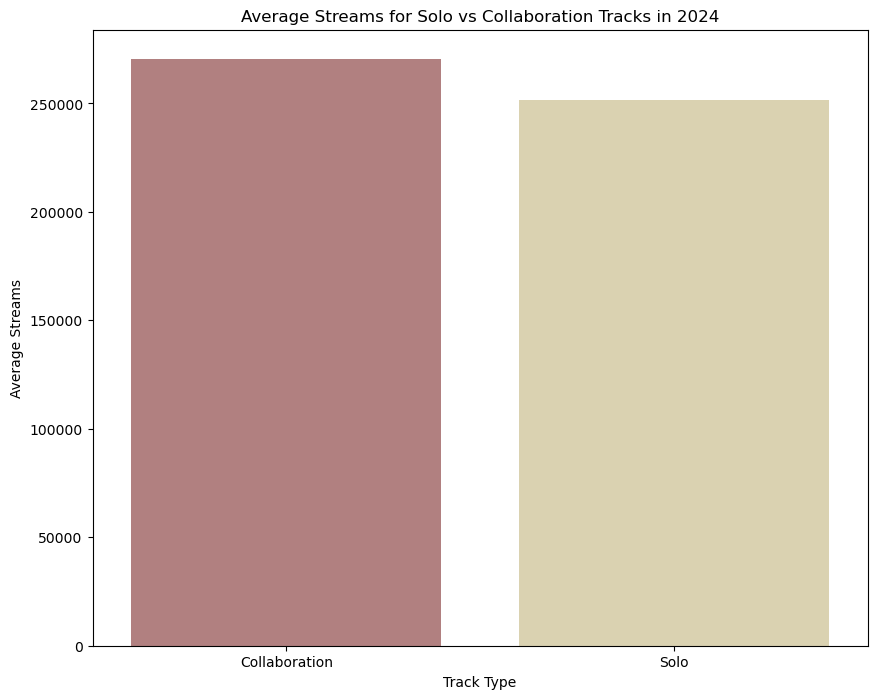

In [116]:
plt.figure(figsize=(10, 8))
sns.barplot(x='track_type', y='streams', data=avg_streams, palette='pink')
plt.title('Average Streams for Solo vs Collaboration Tracks in 2024')
plt.xlabel('Track Type')
plt.ylabel('Average Streams')
plt.xticks(rotation=0)
plt.show()

**From observation of the visualizition**:
- The classification of tracks shows a comparison between Collaboration and Solo tracks. While specific counts aren’t provided here, the focus is on comparing the average streams of both types. The average number of streams for Collaboration tracks is 270,462 streams, while for Solo tracks, it is slightly lower at 251,586 streams.
- Collaboration Tracks outperform Solo Tracks by a margin of approximately 18,876 streams on average. This indicates that collaboration tracks tend to attract more listeners and have a higher engagement rate, likely due to several factors:
    + Broader Audience Reach: With multiple artists involved, the combined fanbases of all artists are drawn to the song, leading to higher exposure and more streams.
    + Increased Promotion: Collaborations are often heavily promoted, as each artist contributes their own marketing efforts, social media presence, and cross-promotion.
    + Variety and Appeal: Collaborations often blend different styles and genres, appealing to a wider range of listeners.
- Given the insights, artists should consider the following strategies for 2024:
    + Focus on Collaborations for Larger Reach: If the goal is to maximize streams and reach a broader audience, collaborating with other artists will likely be the most effective route. Collaborations are particularly beneficial when targeting diverse markets, such as mixing local and international artists, or combining different genres to appeal to a wider range of listeners.
    + Strategic Solo Releases: Despite the success of collaborations, solo tracks are essential for building and solidifying an artist’s identity. Artists should strike a balance by continuing to release solo music that speaks to their core audience while also engaging in collaborations for wider exposure.

**Question 3:** How do the audience's preferences in 2024 reflect the market share of Vietnamese versus international artists?

- Purpose: To identify which artist has the most songs on the chart in 2024, the number of songs, and whether the artist is Vietnamese or other. From this, we will provide insights into the audience's preference for local or global artists.

- Steps to answer:
    + Calculate the number of songs each artist has on the chart in 2024.
    + Identify the artist with the most songs on the chart in 2024.
    + Determine whether the artist is Vietnamese or other.
    + Provide insights on the audience's preference for artists in 2024, including the market share of Vietnamese and international artists.
    + Identify the song with the most consecutive weeks in the top 10 for the top 20 artists.

In [117]:
artist_song_count = df_exploded['artist_names'].value_counts()

# Identify the artist with the most songs
top_20_artist = pd.DataFrame(artist_song_count.head(20))
top_artist_song_count = artist_song_count.max()
top_20_artist

,count
artist_names,
tlinh,105
HIEUTHUHAI,93
GREY D,89
RPT MCK,84
W/N,70
Vũ.,66
"ANH TRAI ""SAY HI""",65
Sơn Tùng M-TP,63
Wren Evans,62


In [118]:
artist_name_map = {
    'W/N': 'W-n-vietnam',
    'Vũ.': 'Vu-vietnam',
    'Da LAB': 'DaLAB',
    'RHYDER': 'rhyder-vnm',
    'Low G': 'Low-g-vnm'
}

# Function to scrape nationality from Genius
def get_artist_nationality(artist_name):
    # Format the artist name to create a valid Genius URL
    artist_name_normalized = artist_name_map.get(artist_name, artist_name.replace(' ', '_').lower())

    artist_url = f"https://genius.com/artists/{artist_name_normalized}"

    # Send a request to the artist's Genius page
    response = requests.get(artist_url)

    # Check if the request was successful
    if response.status_code != 200:
        print(f"Failed to retrieve page for {artist_name}")
        return None

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract the artist description from the <meta> tag
    description_tag = soup.find('meta', property='og:description')
    if description_tag:
        description = description_tag.get('content')
        if description:
            # Check for variations of "Vietnamese" or "Vietnam" (or relevant words)
            if any(keyword in description for keyword in ['Vietnamese', 'Việt Nam', 'Viet Nam', 'VN', 'Hà Nội']):
                return 'Vietnamese'
            else:
                return 'Other'

    return 'Other'

# Apply the nationality function to the top 20 artists
top_20_artist['nationality'] = top_20_artist.index.to_series().apply(get_artist_nationality)

# Calculate market share
market_share = top_20_artist['nationality'].value_counts()
most_songs_artist = top_20_artist.iloc[0]
most_songs_name = most_songs_artist.name
most_songs_count = most_songs_artist
most_songs_nationality = top_20_artist.loc[most_songs_name, 'nationality']

# Print the insights
insights = {
    'Most Songs Artist': most_songs_name,
    'Most Songs Count': most_songs_count,
    'Most Songs Nationality': most_songs_nationality,
    'Market Share Insights': market_share
}

# Display the insights
for key, value in insights.items():
    print(f"{key}: {value}")

Most Songs Artist: tlinh
Most Songs Count: count                 105
nationality    Vietnamese
Name: tlinh, dtype: object
Most Songs Nationality: Vietnamese
Market Share Insights: nationality
Vietnamese    11
Other          9
Name: count, dtype: int64


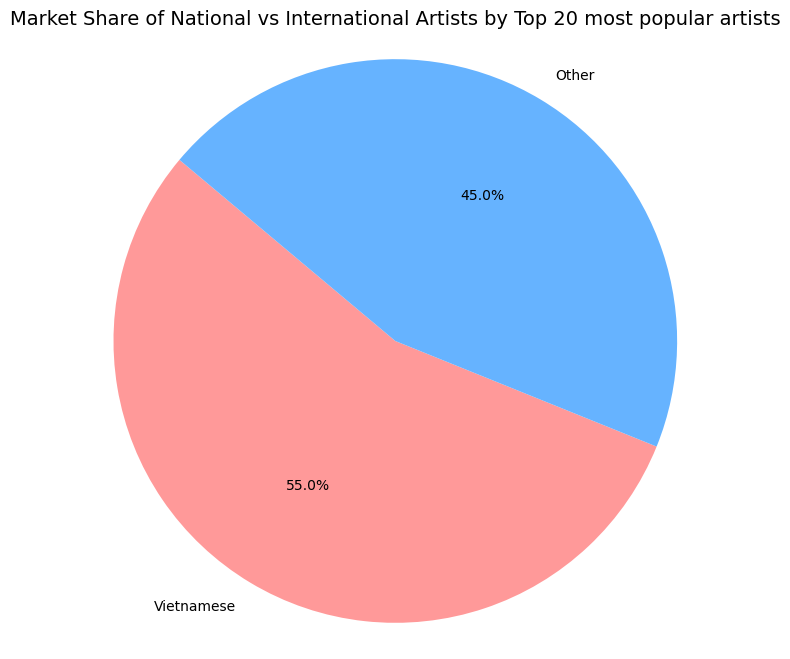

In [119]:
market_share = pd.Series(market_share)

# Define colors for the pie chart
colors = ['#FF9999','#66B3FF']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=False)
plt.title('Market Share of National vs International Artists by Top 20 most popular artists', fontsize=14)
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()


In [120]:
import ast

def get_max_consecutive_weeks(rank_history):
    try:
        # Chuyển rank_history thành list các tuple (tuần, thứ hạng)
        rank_history = ast.literal_eval(rank_history)  
    except Exception as e:
        return 0  # Nếu không thể chuyển đổi, trả về 0

    # Lọc các tuần có hạng <= 10
    top_10_weeks = [week for week, rank in rank_history if rank <= 10]

    # Biến để theo dõi số tuần liên tiếp
    max_streak = 0
    current_streak = 0

    # Check the consecutve week
    for i in range(1, len(top_10_weeks)):
        try:
            current_week = int(top_10_weeks[i].split('/')[1])  
            previous_week = int(top_10_weeks[i-1].split('/')[1])  
            
            if current_week == previous_week + 1: 
                current_streak += 1
            else:
                max_streak = max(max_streak, current_streak)
                current_streak = 1  # Reset streak while not consecutive yet
        except Exception as e:
            continue  

    max_streak = max(max_streak, current_streak)  # Update the new streak
    return max_streak

df['consecutive_weeks_top_10'] = df['rank_history'].apply(get_max_consecutive_weeks)

# Filtered songs of top 20 artists
top_20_artist = top_20_artist.reset_index()
top_20_artists_list = top_20_artist['artist_names'].tolist()

# Display the result
df_filtered = df[df['artist_names'].isin(top_20_artists_list)]
result = df_filtered[['artist_names', 'track_name', 'consecutive_weeks_top_10']]

# The song with the max consecutive weeks in top 10 of those artists
max_consecutive_song = result.loc[result['consecutive_weeks_top_10'].idxmax()]
print(f"The song with the largest number of consecutive weeks in the top 10 is '{max_consecutive_song['track_name']}' by {max_consecutive_song['artist_names']} with {max_consecutive_song['consecutive_weeks_top_10']} consecutive weeks.")

The song with the largest number of consecutive weeks in the top 10 is 'tiny love' by Thịnh Suy with 1 consecutive weeks.


**Key insights:**
- The artist with the most songs on the chart in 2024 is **_tlinh_**, with a total of 105 songs. This indicates **_tlinh_**'s significant presence and popularity on the chart.

- tlinh is a Vietnamese artist, which highlights the substantial representation of Vietnamese artists on the chart.

- Out of the top 20 artists, 11 are Vietnamese, and 9 are others (maybe they're international artists or unknown their nationality). This gives us a balanced yet slightly stronger presence of Vietnamese artists, suggesting that the audience's preference in 2024 leans more towards local talent.

- The song with the highest number of consecutive weeks in the top 10 is `tiny love` by **_Thịnh Suy_**, which spent 1 consecutive week in the top 10. Although the streak is relatively short, it showcases **_Thịnh Suy_**'s strong impact during the period.

**Question 4:** What is the trend of removing a song from the chart top 20?
- Purpose: Identify the trend of removing a song from the chart top 20. From that, we can provide insights on the trend of turnover a song from the chart in 2024.
- Steps to answer:
    + Filter the DataFrame for songs that have been in the top 20.
    + Calculate the duration each song stays in the top 20.
    + Compute the average duration.
    + Analyze the trend of song turnover in the top 20.

In [ ]:
# Filter songs have been in the top 20 in 2024, excluding songs without rank_history
def has_rank_in_top_20(rank_history_str):
    if not isinstance(rank_history_str, str) or rank_history_str == '[]':
        return False  # Skip missing or empty rank histories
    
    rank_history = rank_history_str.strip("[]").split("), (")
    
    for record in rank_history:
        record = record.replace("'", "").lstrip("(").rstrip(")").strip()
        try:
            date, rank = record.split(", ")
            rank = int(rank.strip())  # Convert rank to integer
            if rank <= 20 and "2024" in date:
                return True
        except ValueError:
            continue  # Skip invalid records
    return False

top_20_df = df[df['rank_history'].apply(has_rank_in_top_20)].copy()

In [ ]:
# Extract first and last date in top 20 for each song
def extract_first_last_dates(rank_history_str):
    if not isinstance(rank_history_str, str) or rank_history_str == '[]':
        return None, None  # Return None if no valid rank history
    
    rank_history = rank_history_str.strip("[]").split("), (")
    
    first_date = None
    last_date = None
    
    for record in rank_history:
        record = record.replace("'", "").lstrip("(").rstrip(")").strip()
        try:
            date, rank = record.split(", ")
            rank = int(rank.strip())
            
            if rank <= 20 and "2024" in date:
                if not first_date:
                    first_date = date  # Set the first date
                last_date = date  # Update the last date to the current date
                
        except ValueError:
            continue  # Skip invalid records
    
    return first_date, last_date

top_20_df[['first_date_in_top_20', 'last_date_in_top_20']] = top_20_df['rank_history'].apply(extract_first_last_dates).apply(pd.Series)

# Calculate the duration in days
top_20_df['duration_in_top_20'] = pd.to_datetime(top_20_df['last_date_in_top_20']) - pd.to_datetime(top_20_df['first_date_in_top_20'])
top_20_df['duration_in_top_20'] = top_20_df['duration_in_top_20'].dt.days

# Filter out invalid songs
top_20_df = top_20_df[top_20_df['duration_in_top_20'] > 0]

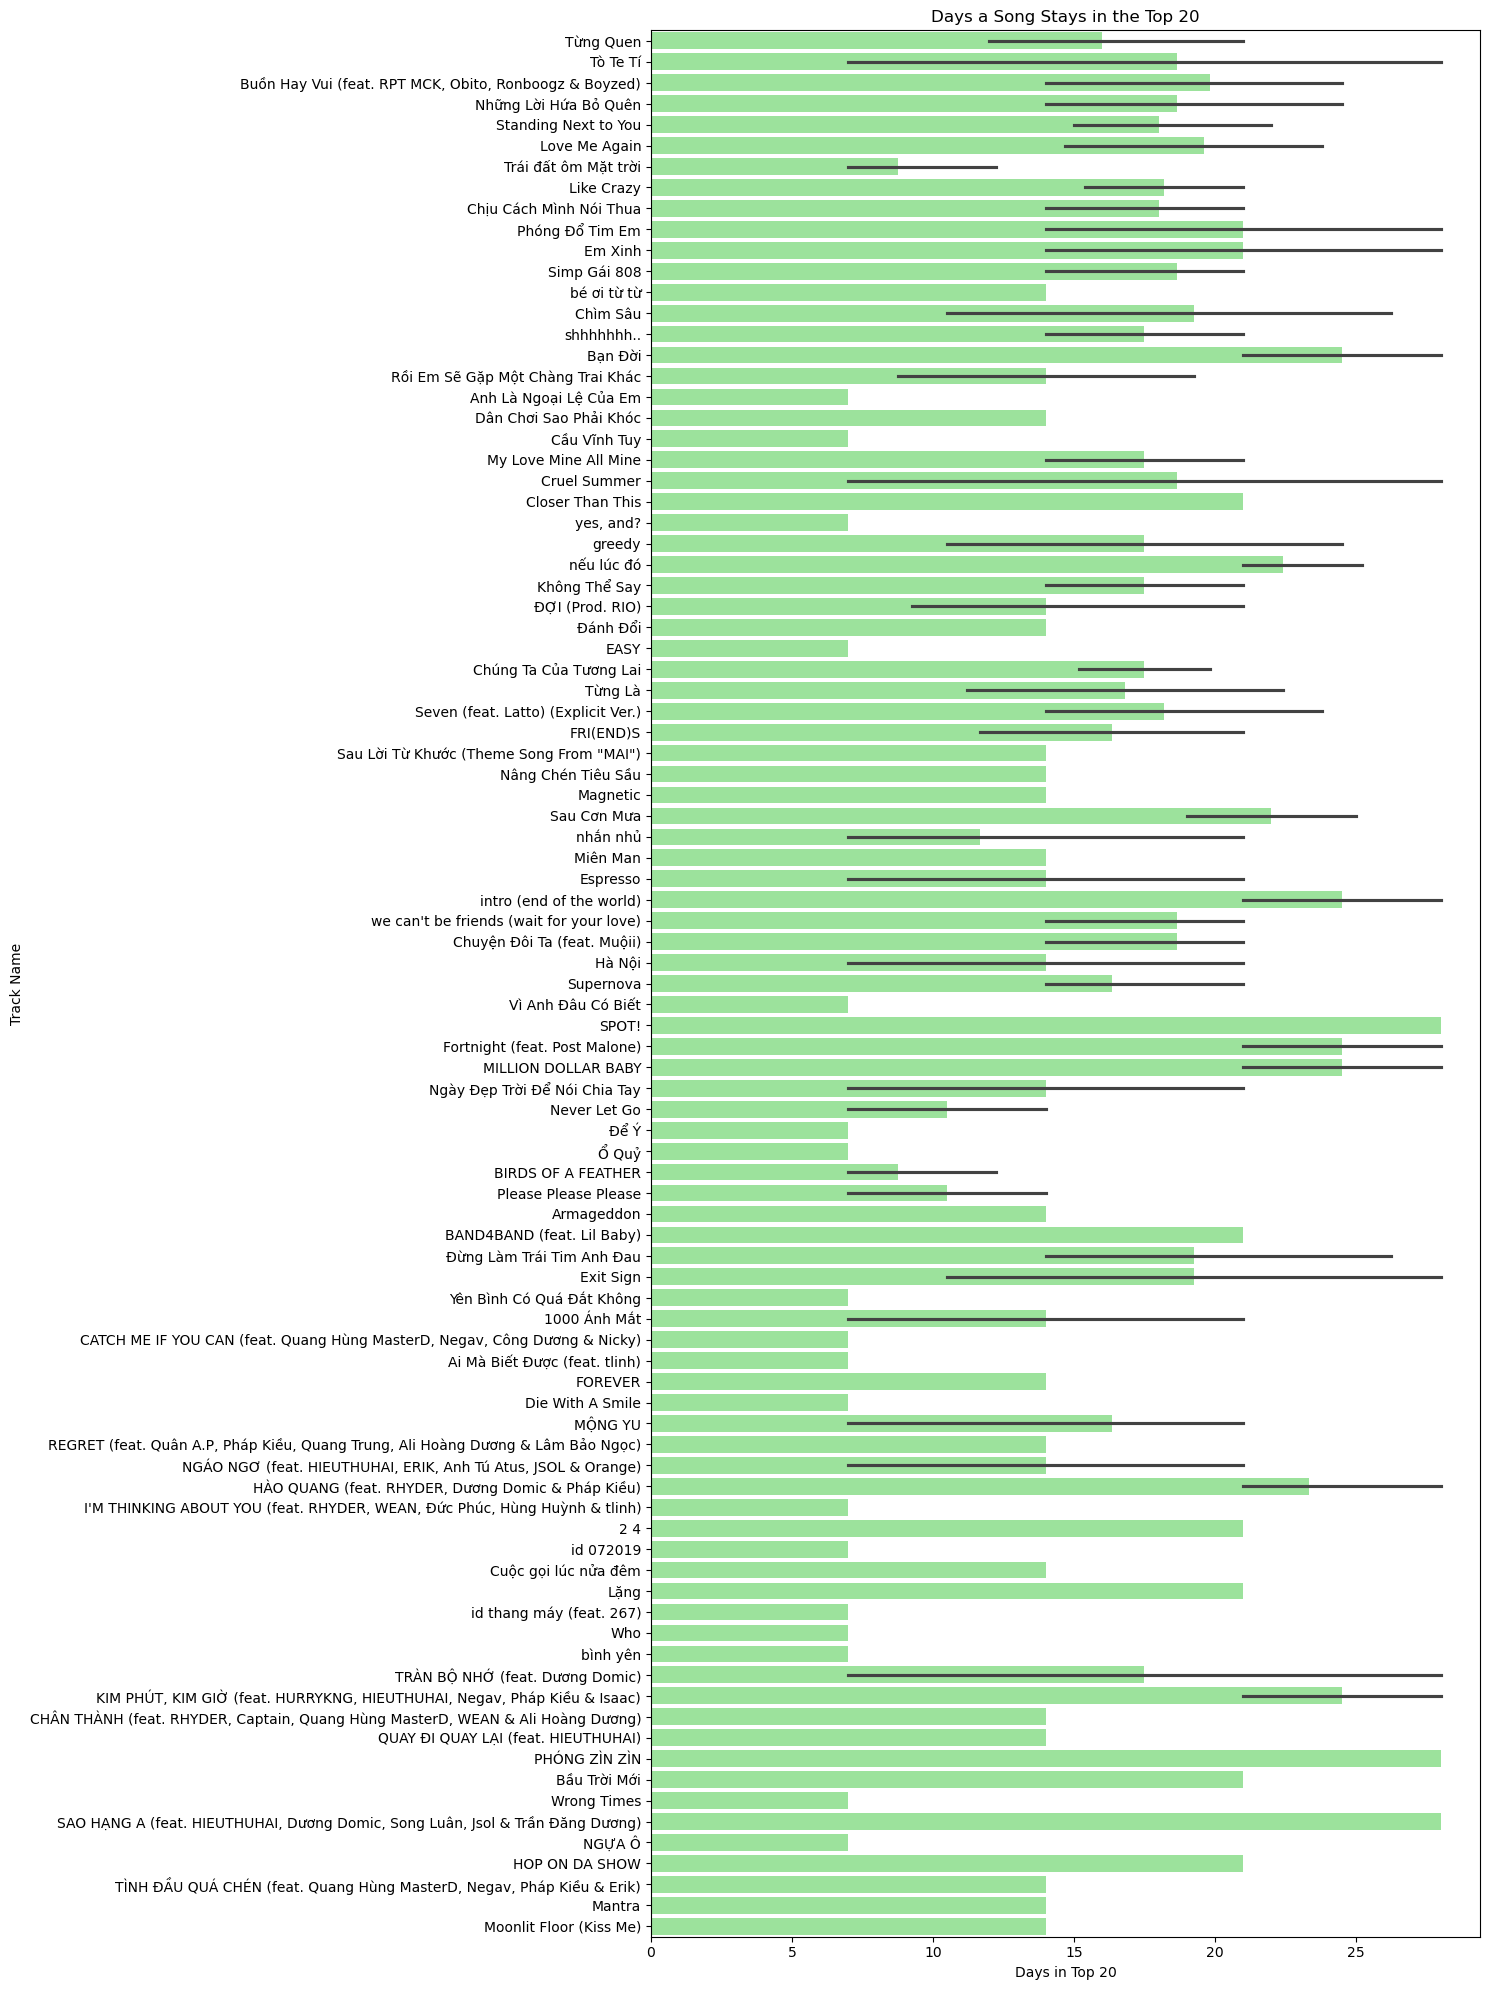

In [ ]:
# Plot bar chart
plt.figure(figsize=(15, 20))
sns.barplot(x='duration_in_top_20', y='track_name', data=top_20_df, color='lightgreen')
plt.xticks(rotation=0)
plt.subplots_adjust(bottom=0.15, top=0.95)
plt.xlabel('Days in Top 20')
plt.ylabel('Track Name')
plt.title('Days a Song Stays in the Top 20')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average duration of songs in top 20 (in days)
average_duration = top_20_df['duration_in_top_20'].mean()
print(f"Average duration a song stays in the top 20 is {average_duration:.1f} days.")

Average duration a song stays in the top 20 is 16.7 days.


**Key insights:**
- Most songs tend to stay in the top 20 for no more than one month.
- Vietnamese songs (e.g. `Bạn đời`, `QUAY ĐI QUAY LẠI`,... - nearly `25 days`) tend to have a longer stay in the top 20 compared to international songs (e.g. `yes, and?`, `EASY` - about `7 days`).
- As the year progresses, songs tend to stay in the chart longer, possibly due to an increase in user demand for music.
- However, some Vietnamese songs have a quite short retention period (e.g. `Cầu Vĩnh Tuy`, `Để Ý` - around `7 days`), while some international songs remain in the top 20 for a significantly longer period (e.g. `SPOT!` for `20-30 days`).
- **In conclusion:** Despite a few insignificant exceptions, the trend shows that Vietnamese music generally stays longer in the top 20, with a noticeable increase in retention towards the end of the year. 

**Question 5:** What is the average time a song rises to the top 20 of the chart wheather calculated from the release date?
- Purpose: Gain the average time a song rises to the top 20 of the chart from the release date. From that, we can provide insights on the time it takes for a song to rise to the top 20 of the chart in 2024.
- Steps to answer:
    + Calculate the time each song rises to the top 20 from the release date.
    + Compute the average time.
    + Analyze the trend of the time it takes for a song to rise to the top 20.

In [ ]:
# Filter songs have been in the top 20 in 2024, excluding songs without rank_history
top_20_df = df[df['rank_history'].apply(has_rank_in_top_20)].copy()

In [ ]:
# Calculate the time difference from release to first top 20 entry
def calculate_time_to_top_20(row):
    first_top_20_date, _ = extract_first_last_dates(row['rank_history'])
    
    if not first_top_20_date:
        return None  # No top 20 entry found
    
    release_date = (row['release_date'])
    entry_date = datetime.strptime(first_top_20_date, '%Y/%m/%d')
    
    return (entry_date - release_date).days

# Calculate the time it takes for each song to rise to the top 20
top_20_df['time_to_top_20'] = top_20_df.apply(calculate_time_to_top_20, axis=1)

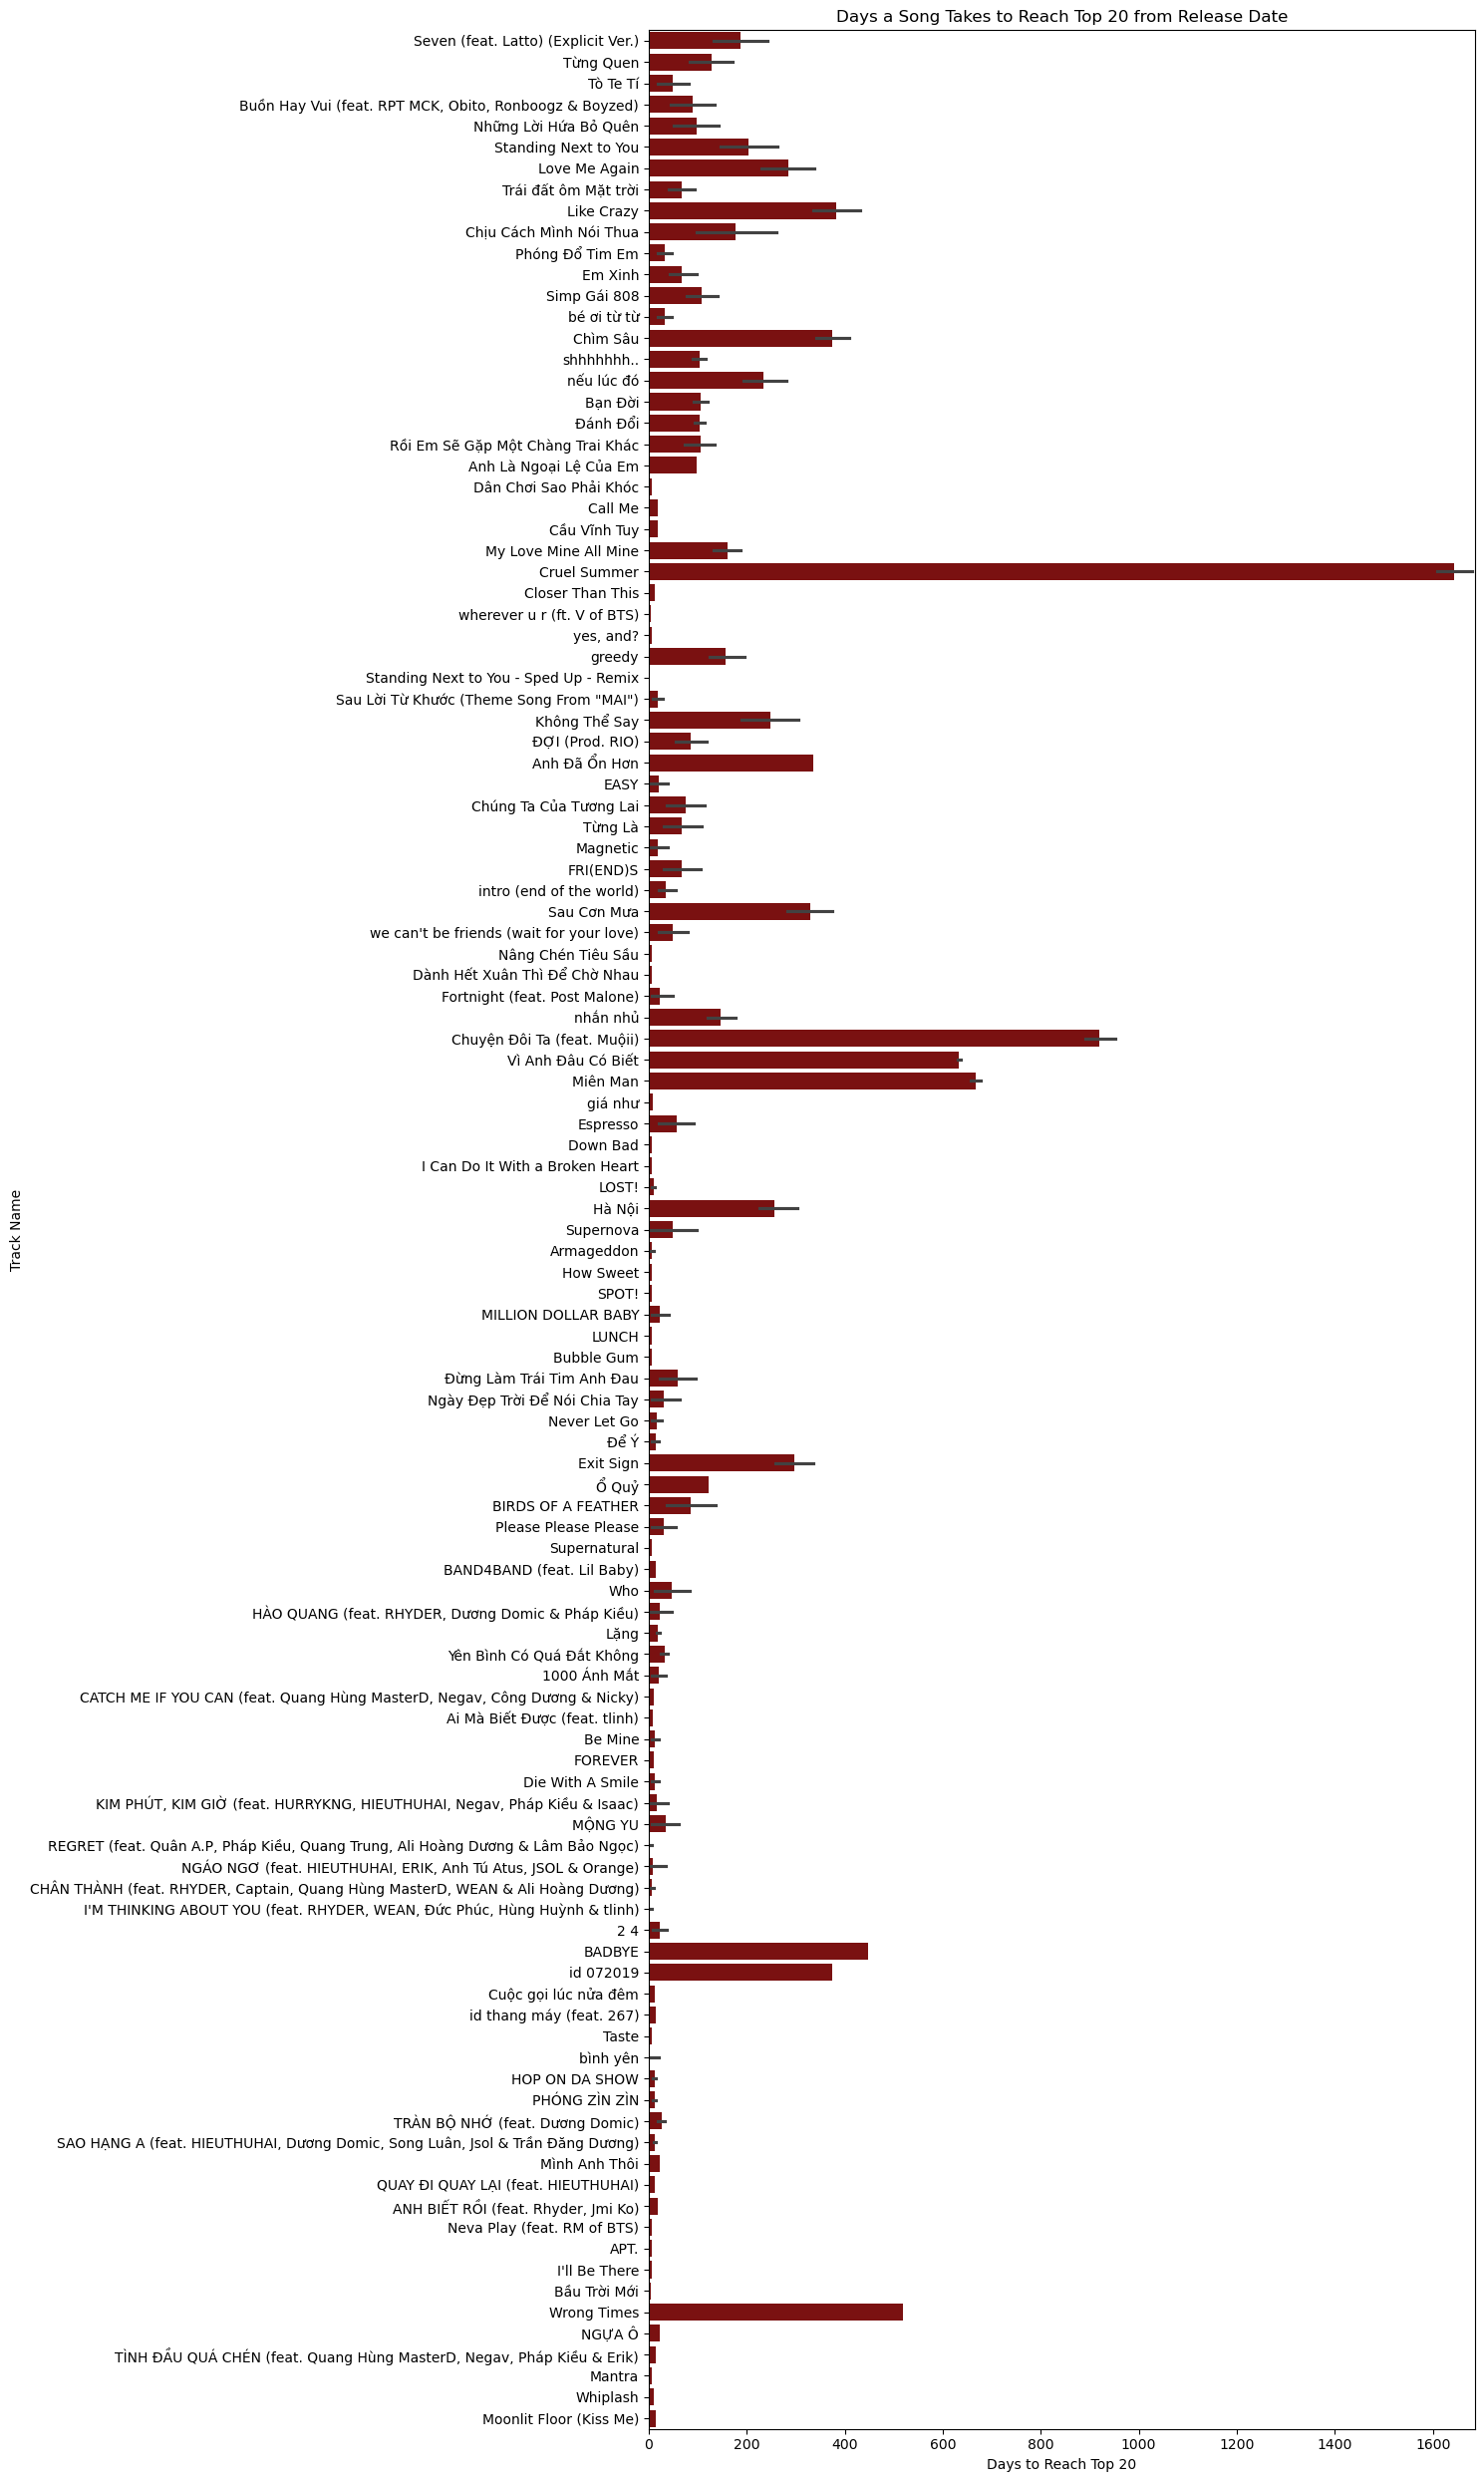

In [ ]:
# Plot bar chart
plt.figure(figsize=(15, 25))
sns.barplot(x='time_to_top_20', y='track_name', data=top_20_df, color='darkred')
plt.xlim(0, top_20_df['time_to_top_20'].max())
plt.xticks(rotation=0)
plt.subplots_adjust(bottom=0.15, top=0.95)
plt.xlabel('Days to Reach Top 20')
plt.ylabel('Track Name')
plt.title('Days a Song Takes to Reach Top 20 from Release Date')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average time to top 20 (in days)
average_time_to_top_20 = top_20_df['time_to_top_20'].mean()
print(f"Average time to reach Top 20: {average_time_to_top_20} days.")

Average time to reach Top 20: 152.41721854304635 days.


**Key insights:**
- The time it takes for songs to reach the top 20 varies significantly, ranging from less than 20 days to over 1000 days.
- Most Vietnamese songs (e.g. `Nâng chén tiêu sầu`, `REGRET`, `bình yên` - approximately `10 days`) take less time to reach the top 20 compared to international songs (e.g. `Cruel Summer` - more `1600 days`).
- Similarly, songs released later in the year tend to reach the top 20 faster, especially during the end-of-year period.
- However, some Vietnamese songs require more time to rise through the ranks (e.g. `Chuyện đôi ta` - nearly `1000 days`), while a few international songs need less time (e.g. `Taste`, `APT.` - about `20 days`).
- **In conclusion:** The time for a song to reach the top 20 largely depends on the origin of the song, and is also influenced by the release time and other external factors.

Save the DataFrame to a new csv file named `spotify_charts_cleaned_v2-v3.csv` in the folder `cleaned_data`.

In [ ]:
df.to_csv('cleaned_data/spotify_charts_cleaned_v2-v3.csv', index=False)